In [1]:
import numpy as np
import pandas as pd
import os
import json
import re
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from opencc import OpenCC

c:\Users\oplab\.conda\envs\IR-new\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\oplab\.conda\envs\IR-new\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\oplab\.conda\envs\IR-new\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
tf.config.list_physical_devices('XLA_GPU')
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

[PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [3]:
import tensorflow as tf

gpu_number = 2 #### GPU number 
gpus = tf.config.list_physical_devices('XLA_GPU')
if gpus:
    tf.config.experimental.set_visible_devices(gpus[0], 'XLA_GPU') 
    logical_gpus = tf.config.experimental.list_logical_devices('XLA_GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")

1 Physical GPUs, 1 Logical GPU


In [4]:
def strQ2B(ustring):
    """把字串空格全形轉半形"""
    ss = []
    for s in ustring:
        rstring = ""
        for uchar in s:
            inside_code = ord(uchar)
            if inside_code == 12288:  # 全形空格直接轉換
                inside_code = 32
            rstring += chr(inside_code)
        ss.append(rstring)
    return ''.join(ss)

In [5]:
dataPath = './Data/Origin/'
files = os.listdir(dataPath)
allContent = ''
for file in files:
    with open(dataPath + file, 'r', encoding='utf-8') as fileRead:
        tempFileJSON = json.load(fileRead)
        tempContent = tempFileJSON['Context']
        tempText = strQ2B(tempContent).replace(' ','').replace("\n", "").replace("\r", "").replace('*','')
        tempText = re.sub(r'[★_-]', "", tempText)
        allContent += tempText

In [6]:
contentLength = len(allContent)
uniqueWords = set(allContent)
print(f"total: {contentLength}")
print(f"包含了{len(uniqueWords)} 個獨一無二的字 (含標點符號)\n")
print(allContent[0:1000])

total: 10977077
包含了5888 個獨一無二的字 (含標點符號)

一这是我第三次到这里来，屋里的摆设还是很陈旧。我局促不安的站着，双手在胸前不停的揉搓着“我……我这次……”“我知道你来是为了什么，回去吧……”我对面的那个男人说话了，声音还是很有力。“可是也只有你了。”“没办法，我也不能清释她的血液。”“你一定会有办法的。”我争取着最后一丝希望，“你未免太小看四世的原血了吧。”那男人有些急了。“可，除了你，我也不知道去找谁了，你可是我能找到的最厉害的血猎了。”“出去吧。”男人最后说了一句。从大门走出来的时候，我感觉自己快死掉了，屋里的气氛确实很压抑。“该死的吸血鬼，没用的血猎。”我无力的诅咒着。“我自己总会有办法的，奥古斯特，等着。”我恨恨的说到。奥古斯特是一个吸血鬼。他是四世，现存唯一的四世。我是一个血猎。吸血鬼猎手。那男人是我的老师。看来，对于四世。我老师和我都……没有办法。二我再次站到117号门前。这里是一栋大别墅：墙壁上爬满绿油油的植物，连门上都是，正面的墙上的窗户都被钉上。似乎连光到这里都被什么东西吞噬了。我推开了门，走了进去：这里很阴冷，屋里很暗，几根蜡烛在墙角的烛台上烧着。两排楼梯通向二楼，楼梯中间，一副大油画，画中的人笑的很冷。“奥古斯特，”我对着油画大喊“我知道你在她也在。出来，我们谈谈。”“谈什么，小血猎。”一顾温柔到极致的声音从虚无中传来，我知道那是奥古斯特的声音“你又不能伤害到我，所以你想谈的根本没希望。”“放了她，好吗，我求你了。”我又一次没骨气了，在老师那次也一样。“谁?”我知道他明知故问。“方凌。”“哦，你说的一定是凌奥古斯特，她现在是我的女人。”“她的血液……”我喉咙沙哑。“放心，四世的原血没有这么快融合的，不过在我的帮助下也快了，现在你知道的够多了，走吧。”“我……让我在看看她……”我乞求着。“当她完全变成血族中的骄傲的时候，她会去找你。”然后奥古斯特有一次让我知道我们之间的差距，他把我扔出别墅，我甚至都没有看到他的脸。三我从地上爬起来，低着头，哭了，“方凌，我爱你。”我对着117号别墅吼着，“我要和你在一起。”，可别墅那边没有反应。我回家。走在街上，一个人都没有，我边走边哭。我爱她，我是血猎，可她马上要成为吸血鬼了。我还得去找他，那个让我成为血猎的男人，我的老师。这是我第四次来了，那男人还在单人沙发坐着，他都没有换过

In [7]:
# 計算字數統計
wordsCount = {}
for w in allContent:
    if w in wordsCount:
        wordsCount[w] += 1
    else:
        wordsCount[w] = 1

wordsCount = sorted(wordsCount.items(),key=lambda x:x[1])

In [8]:
notFrequentWordsCount = 10
notFrequentWords = [_[0] for _ in wordsCount if _[1]<notFrequentWordsCount]
print(f"{len(notFrequentWords)}")
print(notFrequentWords)

1436
['ヽ', '冼', '岱', '埙', '桖', '噏', '呋', '艄', '鑵', '襻', '秣', '媲', '滲', '馑', '嘙', '汊', '進', '稞', '﹐', '﹑', '﹗', '躱', '説', '癜', '踼', '浯', '袼', '褙', '箬', '裰', '檎', '滇', '偁', '僖', '賓', '崚', '疴', '彔', '禇', '濮', '忭', '鸶', '秕', '扽', '褍', 'ㄧ', '滾', '牴', '脫', '棼', '逭', '讼', '睚', '嘇', '萻', '鄳', '畋', '煱', '浲', '鐏', '砻', '溧', '蓖', '犍', '陉', '刬', '蓊', '绐', 'ㄠ', '仞', '裨', '詈', '↖', '嫫', '幓', '砭', '焀', '咹', '忾', '铙', '锴', '髫', '椹', '葚', 'Ｖ', 'ｂ', 'ｈ', '殭', '廪', '蚨', '慝', '疡', '踔', '谵', '﹒', '鹳', '赑', '屃', '酎', '澶', '绀', '芪', '琛', '觌', '￼', '噍', '摃', '仳', '秿', '馓', '喱', '莜', '匈', '仫', '熘', '伧', '蚜', '钏', '岫', '彘', '寤', '△', '溼', '帼', '湫', '蠛', '桡', '镗', '跣', '蚍', '蜉', '龃', '龉', '舂', '磔', '醛', '塺', '烝', '徼', '牗', '蠖', '汆', '吣', '車', '憟', '溷', '牍', '溻', '枊', '暹', '螓', '褔', '徳', '孢', '♀', '∧', '宓', '隹', '阋', 'г', '砹', '畲', 'Α', '竽', '耖', '沬', '涪', '岬', '酰', '岵', '耆', 'ā', '＠', '寮', '螫', '嫠', '噁', '糅', '诨', '強', '垅', '垓', '窨', '査', '枸', '箓', '邕', '崂', '費', '勁', '潞', '戆', '嗌', '礞', '紮', '瘳', '‵', '′', '枰',

In [9]:
print(f"origin length {contentLength}")
print(f"去除不常出現的文字後")
for removeWord in notFrequentWords:
    allContent = allContent.replace(removeWord, '')
uniqueWords = set(allContent)
print(f"剩餘{len(allContent)}個字")
allContent[:500]

origin length 10977077
去除不常出現的文字後
剩餘10972533個字


'一这是我第三次到这里来，屋里的摆设还是很陈旧。我局促不安的站着，双手在胸前不停的揉搓着“我……我这次……”“我知道你来是为了什么，回去吧……”我对面的那个男人说话了，声音还是很有力。“可是也只有你了。”“没办法，我也不能清释她的血液。”“你一定会有办法的。”我争取着最后一丝希望，“你未免太小看四世的原血了吧。”那男人有些急了。“可，除了你，我也不知道去找谁了，你可是我能找到的最厉害的血猎了。”“出去吧。”男人最后说了一句。从大门走出来的时候，我感觉自己快死掉了，屋里的气氛确实很压抑。“该死的吸血鬼，没用的血猎。”我无力的诅咒着。“我自己总会有办法的，奥古斯特，等着。”我恨恨的说到。奥古斯特是一个吸血鬼。他是四世，现存唯一的四世。我是一个血猎。吸血鬼猎手。那男人是我的老师。看来，对于四世。我老师和我都……没有办法。二我再次站到117号门前。这里是一栋大别墅：墙壁上爬满绿油油的植物，连门上都是，正面的墙上的窗户都被钉上。似乎连光到这里都被什么东西吞噬了。我推开了门，走了进去：这里很阴冷，屋里很暗，几根蜡烛在墙角的烛台上烧着。两排楼梯通向二楼，楼梯中间，一副大油画，画中的人笑的很冷。“奥古斯'

In [10]:
# 文字轉數字(index)
word2Index = {word:index for index,word in enumerate(uniqueWords)}
index2Word = {word2Index[word]:word for word in word2Index}

content2Index = [word2Index[w] for w in allContent]

print("原始文字 : ")
print(allContent[:40])
print("轉成index : ")
print({word2Index[w] for w in allContent[:40]})

原始文字 : 
一这是我第三次到这里来，屋里的摆设还是很陈旧。我局促不安的站着，双手在胸前不停的
轉成index : 
{650, 1290, 1933, 3985, 3097, 30, 4260, 935, 2088, 425, 1195, 1918, 1074, 3767, 1209, 1093, 2630, 3145, 1995, 3534, 4049, 4177, 2005, 1116, 1762, 3557, 1639, 1895, 4335, 1522, 2814, 1791}


In [11]:
def ind2word_seq(seq):
    return [index2Word[i] for i in seq]

In [12]:
# 設定輸入模型長度
seq_len = 100
characters = tf.data.Dataset.from_tensor_slices(content2Index)

sequences = characters.batch(seq_len+1,drop_remainder=True)

for seq in sequences.take(2):
    print(seq.shape)
    print(seq)
    print([index2Word[i] for i in seq.numpy()])

(101,)
tf.Tensor(
[3985 1639 2814 1195 1918 2005 1895 4260 1639 1522   30 1995 3767 1522
 3145  650 2088 1933 2814 4049 1762 1093 1209 1195 3097 4335 1074 1791
 3145 1116  425 1995  935 2630 3534 1290 3557 1074 4177 3145 3091  388
  425 3336 1195 3664 3664 1195 1639 1895 3664 3664 3293 3336 1195  859
 3742  437   30 2814  811 4337 2513  873 1995 1100  753   59 3664 3664
 3293 1195 2907 4037 3145 2096 3897  204 4295 4234 2399 4337 1995 1684
 2471 1933 2814 4049 2017 1577 1209 3336 2422 2814 1760 3212 2017  437
 4337 1209 3293], shape=(101,), dtype=int32)
['一', '这', '是', '我', '第', '三', '次', '到', '这', '里', '来', '，', '屋', '里', '的', '摆', '设', '还', '是', '很', '陈', '旧', '。', '我', '局', '促', '不', '安', '的', '站', '着', '，', '双', '手', '在', '胸', '前', '不', '停', '的', '揉', '搓', '着', '“', '我', '…', '…', '我', '这', '次', '…', '…', '”', '“', '我', '知', '道', '你', '来', '是', '为', '了', '什', '么', '，', '回', '去', '吧', '…', '…', '”', '我', '对', '面', '的', '那', '个', '男', '人', '说', '话', '了', '，', '声', '音', '还', '是', '很',

In [13]:
# 做input、target切割
def split_input_target(seq):
    input_txt = seq[:-1]
    target_txt = seq[1:]
    return input_txt,target_txt

In [14]:
dataset = sequences.map(split_input_target)

for input_example,target_exaple in dataset.take(1):
    print("Input :", ind2word_seq(input_example.numpy()))
    print("Target:", ind2word_seq(target_exaple.numpy()))
    print("-"*50)
    print("Input :", input_example.numpy())
    print("Target:", target_exaple.numpy())

Input : ['一', '这', '是', '我', '第', '三', '次', '到', '这', '里', '来', '，', '屋', '里', '的', '摆', '设', '还', '是', '很', '陈', '旧', '。', '我', '局', '促', '不', '安', '的', '站', '着', '，', '双', '手', '在', '胸', '前', '不', '停', '的', '揉', '搓', '着', '“', '我', '…', '…', '我', '这', '次', '…', '…', '”', '“', '我', '知', '道', '你', '来', '是', '为', '了', '什', '么', '，', '回', '去', '吧', '…', '…', '”', '我', '对', '面', '的', '那', '个', '男', '人', '说', '话', '了', '，', '声', '音', '还', '是', '很', '有', '力', '。', '“', '可', '是', '也', '只', '有', '你', '了', '。']
Target: ['这', '是', '我', '第', '三', '次', '到', '这', '里', '来', '，', '屋', '里', '的', '摆', '设', '还', '是', '很', '陈', '旧', '。', '我', '局', '促', '不', '安', '的', '站', '着', '，', '双', '手', '在', '胸', '前', '不', '停', '的', '揉', '搓', '着', '“', '我', '…', '…', '我', '这', '次', '…', '…', '”', '“', '我', '知', '道', '你', '来', '是', '为', '了', '什', '么', '，', '回', '去', '吧', '…', '…', '”', '我', '对', '面', '的', '那', '个', '男', '人', '说', '话', '了', '，', '声', '音', '还', '是', '很', '有', '力', '。', '“', '可', '是', '也', '只', '有', '你

In [15]:
# 建立資料集
# Batch size
BATCH_SIZE = 128

BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True))

dataset

<BatchDataset shapes: ((128, 100), (128, 100)), types: (tf.int32, tf.int32)>

In [16]:
# 超參數
EMBEDDING_DIM = 512

# 使用 keras 建立一個非常簡單的 LSTM 模型
model = tf.keras.Sequential()

model.add(
  tf.keras.layers.Embedding(
    input_dim=len(uniqueWords), 
    output_dim=EMBEDDING_DIM
))

model.add(
  tf.keras.layers.LSTM(
    units=2048, 
    return_sequences=True, 
))

model.add(
  tf.keras.layers.LSTM(
    units=1024, 
    return_sequences=True,
))
  
model.add(
  tf.keras.layers.Dense(
      len(uniqueWords),activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         2279424   
_________________________________________________________________
lstm (LSTM)                  (None, None, 2048)        20979712  
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 1024)        12587008  
_________________________________________________________________
dense (Dense)                (None, None, 4452)        4563300   
Total params: 40,409,444
Trainable params: 40,409,444
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 查看模型的輸入、輸出 shape
for input_example,target_exaple in dataset.take(1):
    predict_example = model(input_example)
    print(f"Model input shape : {input_example.shape}")
    print(f"Model output shape : {predict_example.shape}")
    print(f"Model target shape : {target_exaple.shape}")

Model input shape : (128, 100)
Model output shape : (128, 100, 4452)
Model target shape : (128, 100)


In [18]:
print("原本的中文字序列：")
[print(index2Word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入尚未訓練的model後獲得：")
print()

predict_words = tf.math.argmax(predict_example[0],-1)
[print(index2Word[ind],end="") for ind in predict_words.numpy()]
print()

原本的中文字序列：
边。”她满不在乎地抬手指向前面，“看到那个白色的顶了吗?那里就是女生宿舍楼。”我顺着她指的方向望去，绿荫中确实有一些白晃晃的房子的影子。“谢谢。”我刚要往前走，却被她喊住：“你等等!”“什么事啊?”我
----------------------------------------
輸入尚未訓練的model後獲得：

睬啤吕吕吕吕吕贷弘弘巴巴巴巴奥铄铄碰碰熊数数阑数数阑嘈社社hhh综冠冠冠冠展褶异异异异蔽蔽蔽蔽乘盔铝畜畜乘脊脊必必霄霄蛊饭饭饭饭饭饭葬察丑丑赖赖赖楚楚楚楚椎第第第楚纳纳纳纳拳拳拳兑兑兑秋见见抚见见见架


In [20]:
checkpoint_path = "./CheckPoint/ckipCp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam")

In [21]:
EPOCHS = 30
history = model.fit(
    dataset, # 前面使用 tf.data 建構的資料集
    epochs=EPOCHS,
    callbacks=[cp_callback]
)

Epoch 1/30
848/848 [==============================] - ETA: 0s - loss: 6.1435
Epoch 00001: saving model to ./CheckPoint\ckipCp.ckpt
848/848 [==============================] - 477s 563ms/step - loss: 6.1435
Epoch 2/30
848/848 [==============================] - ETA: 0s - loss: 5.1965
Epoch 00002: saving model to ./CheckPoint\ckipCp.ckpt
848/848 [==============================] - 486s 573ms/step - loss: 5.1965
Epoch 3/30
848/848 [==============================] - ETA: 0s - loss: 4.5292
Epoch 00003: saving model to ./CheckPoint\ckipCp.ckpt
848/848 [==============================] - 487s 575ms/step - loss: 4.5292
Epoch 4/30
848/848 [==============================] - ETA: 0s - loss: 4.1736
Epoch 00004: saving model to ./CheckPoint\ckipCp.ckpt
848/848 [==============================] - 487s 575ms/step - loss: 4.1736
Epoch 5/30
848/848 [==============================] - ETA: 0s - loss: 3.9757
Epoch 00005: saving model to ./CheckPoint\ckipCp.ckpt
848/848 [==============================] - 488s 5

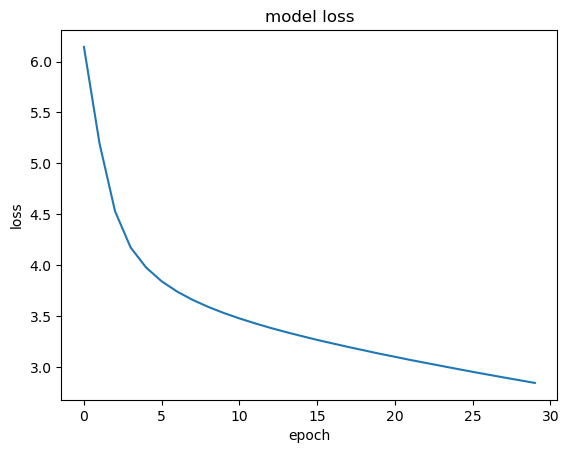

In [22]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [23]:
after_train_predictions = model(input_example)
after_sampled_indices = tf.argmax(after_train_predictions[0],1)

print("原本的中文字序列：")
[print(index2Word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入進訓練後的model後獲得：")
print()

[print(index2Word[ind],end="") for ind in after_sampled_indices.numpy()]
print()

原本的中文字序列：
边。”她满不在乎地抬手指向前面，“看到那个白色的顶了吗?那里就是女生宿舍楼。”我顺着她指的方向望去，绿荫中确实有一些白晃晃的房子的影子。“谢谢。”我刚要往前走，却被她喊住：“你等等!”“什么事啊?”我
----------------------------------------
輸入進訓練後的model後獲得：

，不我说脸在乎地说头指点地方，那你到了里女色的女灯，？”是面是一生宿舍的。”“问着她的的方向望去，只色中，实有个些人晃晃的东子，光子，“你谢你”我不要问前走，我发我一了了“你怎着。”我我么???”“问


In [45]:
modelName = 'LSTM_OpLabV2'
model.save("./Model/"+ modelName +".h5")
# 保存模型权重的路径
model.save_weights("./Model/"+ modelName)

jsonDict = json.dumps(word2Index, indent=2, ensure_ascii=False)
with open ('./Model/' + modelName + '_dic.json', "w",  encoding="utf-8") as outfile:
    outfile.write(jsonDict)

In [26]:
# 預測文字，並把預測文字循環當作下一次的輸入

# 設定你的temperature
temperature = 0.01

def generateWords(input,words=500):
    [print(index2Word[ind],end="") for ind in input]
    for i in range(words):
        next_input = tf.expand_dims(input,axis=0)
        predicts = model(next_input)
        predicts = predicts[:,-1,:]
        predicts /= temperature
        result = tf.random.categorical(
            predicts,num_samples=1
        )
        chinese_ind = tf.squeeze(result).numpy()
        print(index2Word[chinese_ind],end="")
        input = input+[chinese_ind]
        input = input[-seq_len:]

In [29]:
cc = OpenCC('t2s')
init_seq = cc.convert("鬼")
init_seq_ind = [word2Index[w] for w in init_seq]
input = init_seq_ind[-seq_len:]

for i in range(1):
        next_input = tf.expand_dims(input,axis=0)
        predicts = model(next_input)
        print(predicts)
        predicts = predicts[:,-1,:]
        print(predicts)

[2642]
tf.Tensor(
[[[1.9375507e-08 8.9387328e-15 5.8538558e-06 ... 1.4373019e-13
   1.4763663e-03 3.3375802e-08]]], shape=(1, 1, 4452), dtype=float32)
tf.Tensor(
[[1.9375507e-08 8.9387328e-15 5.8538558e-06 ... 1.4373019e-13
  1.4763663e-03 3.3375802e-08]], shape=(1, 4452), dtype=float32)


In [28]:
init_seq = cc.convert("鬼")
init_seq_ind = [word2Index[w] for w in init_seq]
input = init_seq_ind[-seq_len:]

generateWords(input,1500)

鬼，镖村的山@面，铎就会侯在一起，猪儿鬼也不要怪我，我也不会放过你的。”“那你们怎么会在这里？”“我们是不是睑的，你们怎么会这样？”“我们是不是满腔热情的，我们轴管在你们身上，《娼手杀手”的事情，我们接着说道：“康伯，你们看，这里是一个桶里面，诉说着一个弯道，涌进来的，你们都不知道，我们的揉搓手，鸦雀无声，麦穗功能，它们要Uhviper。”“这么多年，你们都不知道，我们韵物法不是恿卉剧，娆人，你们熬夜以后，我们一起去看看你们。”“那你们怎么勤快？”“我们是来找你的。”“那你们怎么不去上班？”“我是翊友，是我们窚地廓。”“那个女人是谁？”“我是蹉地，我是扔了这个女人的女儿，我不想死，我不会放过你的。”“你不是紧紧追求你了吗？”“我不是鬼，是你的女儿，我不想死，我不会放过你的！”“我不是人，是我的女儿，我不想死，我不会放过你的！”“我不是人，是我的孩子，你不要害我，我不能杀你，我不会放过你的。”“我不是人，是我的女儿，你 我……”“我不是你，我是你的女儿，我是颚走了我的废物，你荫着，我要你偿命！”“我不要你死，我不能再坡下去了，我不要你死，我要杀了她。”“你不要害我，我不能杀你，我不会放过你的，你混得铺子，你不要衙当，我要你偿命。”“你不要乔冉的，我不会放过你的！”“你不是说过，你不是祀里有鬼，你不是说你是鬼？”“我不是人，是鬼！”“你不是说你是鬼？”“我不是鬼，是鬼！”“你不是说你在看什么？”“我是鬼！”“我是鬼！”“你是谁？”“我是鬼！”“你说什么？”“我是鬼！”“你是谁？”“我是鬼！”“我是鬼！”“你是谁？”“我是鬼！”“你是谁？”“我是鬼！”我暂时不想再看下去。“谓！”我惠混了，我稣不顾及地说。“我们不是人，你们不要在这里，我们不会惹你们的。”“我们是不是混乱不下的，我们签个柏字有问题，你们读者哺乳，栈里有鬼！”“我们是不是蛀虫太重了，我们不该纱布多少钱？”“我不是鬼，我是鬼，你不是鬼，是鬼，你淡淡的桃子，你不要害怕，我不是鬼，你是鬼，你是鬼，你是鬼，你是鬼，你是鬼，你是鬼，你不是鬼，是鬼！”“你晗抻长嘴，我不是鬼，是鬼！”“我是鬼，你是鬼！”“我是鬼，你是鬼，你是鬼，你是鬼，你是鬼，你是鬼，你是鬼，你不是鬼，你是鬼，你是鬼，你是鬼，你不是鬼，是鬼，你是鬼，你是鬼，你是鬼？”“我是鬼！”“我是鬼！”我奔上前去，看见他的热气味，丑陋不堪的脸，峨着一双黑黝黝的大眼睛